<a href="https://colab.research.google.com/github/Anchayadav/AutoTS/blob/main/Process_of_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
import nltk
nltk.download('stopwords')
data=pd.read_csv("IMDB Dataset.csv")
print(data.head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [ ]:
from nltk.stem.snowball import stopwords
import nltk
import re
nltk.download('stopwords')
stemmer =nltk.SnowballStemmer("english")
import string
stopword =set(stopwords.words('english'))
def clean(text):
  text =str(text).lower()
  text =re.sub('\[.*?\]','',text)
  text=re.sub('https?://\S+|www\.\S+','',text)
  text=re.sub('<.*>+','',text)
  text=re.sub('[%s]' % re.escape(string.punchuation),'',text)
  text=re.sub('\n','',text)
  text=re.sub('\w*\d\w*','',text)
  text=[word for  word in text.split(' ') if word not in stopword]
  text =" ".join(text)
  text=[stemmer.stem(word) for word in text.split(' ')]
  text =" ".join(text)
  return text
  data['review']=data['review'].append(clean)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


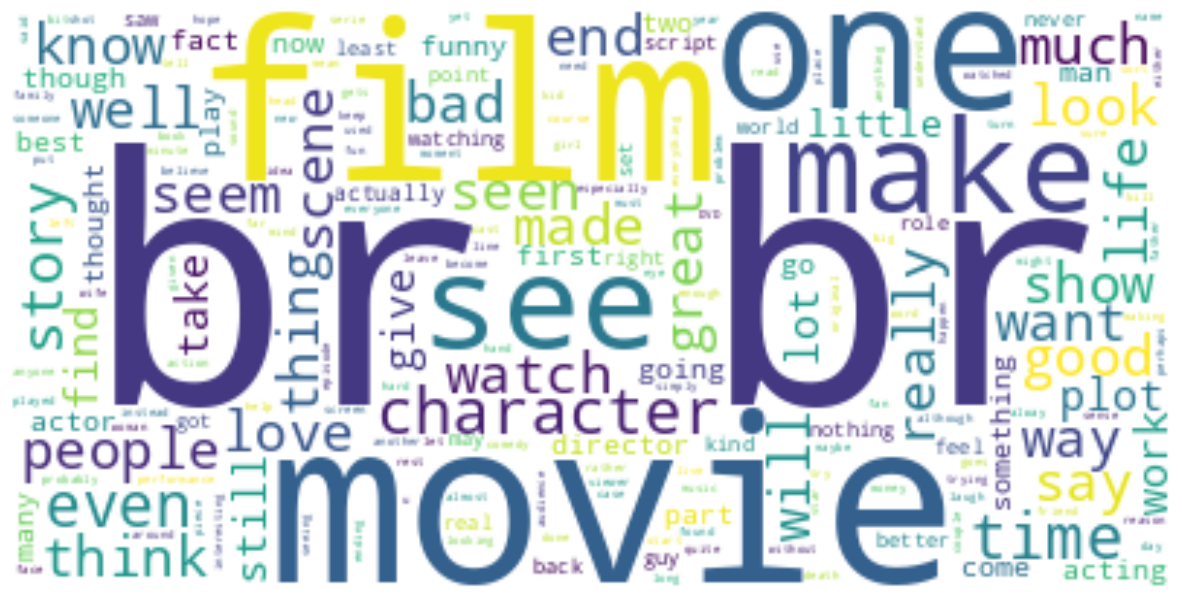

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
text =" ".join(i for i in data.review)
stopwords =set(STOPWORDS)
wordcloud=WordCloud(stopwords=stopwords,background_color='white').generate(text)
plt.figure(figsize=(15,10))
plt.axis('off')
plt.imshow(wordcloud,interpolation='bilinear')
plt.show()




In [ ]:
x=np.array(data['review'])
y=np.array(data['sentiment'])
cv=CountVectorizer()
x=cv.fit_transform(x)
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=42)


In [ ]:
# Sentiment Analysis  is a defined the positive or nagetive of the textof analysis


from sklearn.linear_model import PassiveAggressiveClassifier
model=PassiveAggressiveClassifier()
model.fit(xtrain,ytrain)

PassiveAggressiveClassifier()

In [ ]:
user =input("Enter a text")
data=cv.transform([user]).toarray()
output=model.predict(data)
print(output)

Enter a textBasically there's a family where a little boy ...
['negative']
